# 1. Lý thuyết

**1) Để khởi tạo model trong pytorch chúng ta sử dụng class nào?**

A. nn.Module

B. nn.Dense

C. nn.optim.Adam

D. nn.Dropout

**2) Để khởi tạo mạng neural network trong pytorch chúng ta cần làm gì ?**

A. Kế thừa lại class `nn.Model`. Khởi tạo các layers trong hàm tạo `__init__()` và sử dụng các layers để tính toán dữ liệu trong hàm `forward()`.

B. Khởi tạo một object của class `nn.Model` và sử dụng hàm `add()` để thêm từng layer vào mô hình.

C. Sử dụng class `nn.Model` để khởi tạo mô hình. Truyền vào bên trong class này một list gồm các layers.

D. Kế thừa lại class `nn.Module`. Khởi tạo các layers trong hàm tạo `__init__()` và sử dụng các layers để tính toán dữ liệu trong hàm `forward()`.


**3) Các modules chính trong pytorch dùng để xây dựng và huấn luyện model.**

A. `torch.nn`: Dùng để khởi tạo các layers và activations function và loss function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader.

B. `torch.nn`: Dùng để khởi tạo các layers và activations function và loss function, `torch.optim`: Khởi tạo optimizer, `torch.utils.data`: Khởi tạo dataset và dataloader.

C. `torch.nn`: Dùng để khởi tạo các layers và activations function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader, `torch.loss`: Khởi tạo loss function.

D. `torch.nn`: Dùng để khởi tạo các layers và loss function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader, `torch.activations`: Khởi tạo activations function.


**4) Để customize một Dataset trên pytorch chúng ta cần thực hiện như thế nào?**

A. Sử dụng thuộc tính `transformer` để qui định các biến đổi trên dữ liệu. Những biến đổi này được thực hiện trên hàm tạo.

B. Khởi tạo một class kế thừa lại `torch.utils.data.Dataset`. Khai báo các thuộc tính cần sử dụng trong hàm tạo của dataset như list đường dẫn, list label. Override lại hàm `__getitem__()` để thực hiện các xử lý trên dữ liệu.

C. Kế thừa lại một class `Dataset`. Các điều chỉnh trên dữ liệu được thực hiện trên hàm `transformer()`.

D. Sử dụng hàm `__getitem__()` để trả về toàn bộ các quan sát khi huấn luyện. 

**5) Ý nghĩa của tham số epochs và batch_size trong huấn luyện mô hình là gì?**

A. epochs là kích thước của một mini-batch, batch_size là số lượt lặp lại toàn bộ dữ liệu khi huấn luyện.

B. epochs là số lượt lặp lại toàn bộ dữ liệu validation khi huấn luyện, batch_size là kích thước của một mini-batch.

C. epochs là số lượt lặp lại toàn bộ dữ liệu train khi huấn luyện, batch_size là kích thước của một mini-batch.

D. epochs là số lượng vòng lặp, mỗi vòng lặp là một lượt fit mini-batch, trên bộ dữ liệu khi huấn luyện; batch_size là kích thước của một mini-batch.

1. A
2. D
3. D
4. B
5. C

# 2. Thực hành
9) Từ bộ dữ liệu [Income-Classification](https://www.kaggle.com/t/090688c8d33a40b68be9e271d6ba6bae) hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20. 

10) Xây dựng một mạng deep-neural-network để huấn luyện mô hình trên dữ liệu train và đánh giá mô hình trên dữ liệu test.


In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as td

6) Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3

In [ ]:
tensor = torch.normal(0, 1, size=(32,32,3))
tensor.shape

torch.Size([32, 32, 3])

7) Nếu coi tensor trên là một bức ảnh RGB với số channel là 3 ở cuối. Hãy truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.

In [ ]:
R, G, B = tensor[:, :, 0], tensor[:, :, 1], tensor[:, :, 2]
print("R channel shape is", R.shape)
print("G channel shape is", G.shape)
print("B channel shape is", B.shape)

R channel shape is torch.Size([32, 32])
G channel shape is torch.Size([32, 32])
B channel shape is torch.Size([32, 32])


8) Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.

In [ ]:
hadamard = R*G
dot = R@G
print("Hadamard result:", hadamard)
print("Dot result:", dot)

Hadamard result: tensor([[ 9.2984e-01,  2.5780e-01,  2.5406e-01,  ..., -1.0990e-01,
          1.1375e+00,  1.1278e-03],
        [-1.0653e+00,  3.5361e+00,  1.9992e-02,  ...,  4.6554e+00,
          4.1460e-02, -6.3764e-01],
        [-2.9441e-01, -5.9593e-01, -2.4878e+00,  ...,  1.0128e+00,
         -8.6901e-02,  5.3690e+00],
        ...,
        [ 4.0244e+00, -4.5119e-01, -1.0412e+00,  ..., -1.9810e-01,
         -1.3530e-01, -2.5852e-01],
        [ 1.5391e-01, -6.4069e-01, -1.7170e+00,  ..., -7.8051e-02,
         -2.2570e+00,  4.2701e-01],
        [-8.0182e-05,  2.0654e-01, -1.8075e-01,  ..., -1.5942e-02,
         -7.5958e-03,  2.5935e+00]])
Dot result: tensor([[ -8.2870,   5.4103,   3.9476,  ...,   5.6832,   4.0001,   1.7126],
        [ -8.7435,   2.9878,  -6.8352,  ...,   5.7954,   2.6789, -12.7570],
        [  0.5546,   1.1447,  -0.9316,  ...,  -2.7029, -11.0116,   6.6571],
        ...,
        [  5.9811,  -1.8880,  11.0016,  ...,  -7.4994, -11.3698,   4.6692],
        [  2.2514,  -0

9) Từ bộ dữ liệu [Income-Classification](https://www.kaggle.com/t/090688c8d33a40b68be9e271d6ba6bae) hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20. 

##Import thư viện

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
                           f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("train.csv")
df.drop('ID', axis=1, inplace=True)
df.head()

,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality,target_income
0,45,Private,175925,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,M,0,0,40,US,0
1,23,Private,113601,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,M,0,0,30,US,0
2,22,Private,112137,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,F,0,0,20,South,0
3,27,Private,153078,Prof-school,15,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,M,0,0,40,US,0
4,18,Private,375515,11th,7,Never-married,Sales,Own-child,White,F,0,0,20,US,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  25000 non-null  int64 
 1   work_type            25000 non-null  object
 2   final_weight         25000 non-null  int64 
 3   education            25000 non-null  object
 4   total_education_yrs  25000 non-null  int64 
 5   marital_state        25000 non-null  object
 6   job                  25000 non-null  object
 7   status               25000 non-null  object
 8   ethnicity            25000 non-null  object
 9   sex                  25000 non-null  object
 10  capital_gain         25000 non-null  int64 
 11  capital_loss         25000 non-null  int64 
 12  hrs_per_week         25000 non-null  int64 
 13  nationality          25000 non-null  object
 14  target_income        25000 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.9+ MB


##Trực quan hóa dữ liệu

###Categorical columns

In [ ]:
cat_cols = df.select_dtypes('object').columns
print(f"There are {len(cat_cols)} object columns")

There are 8 object columns


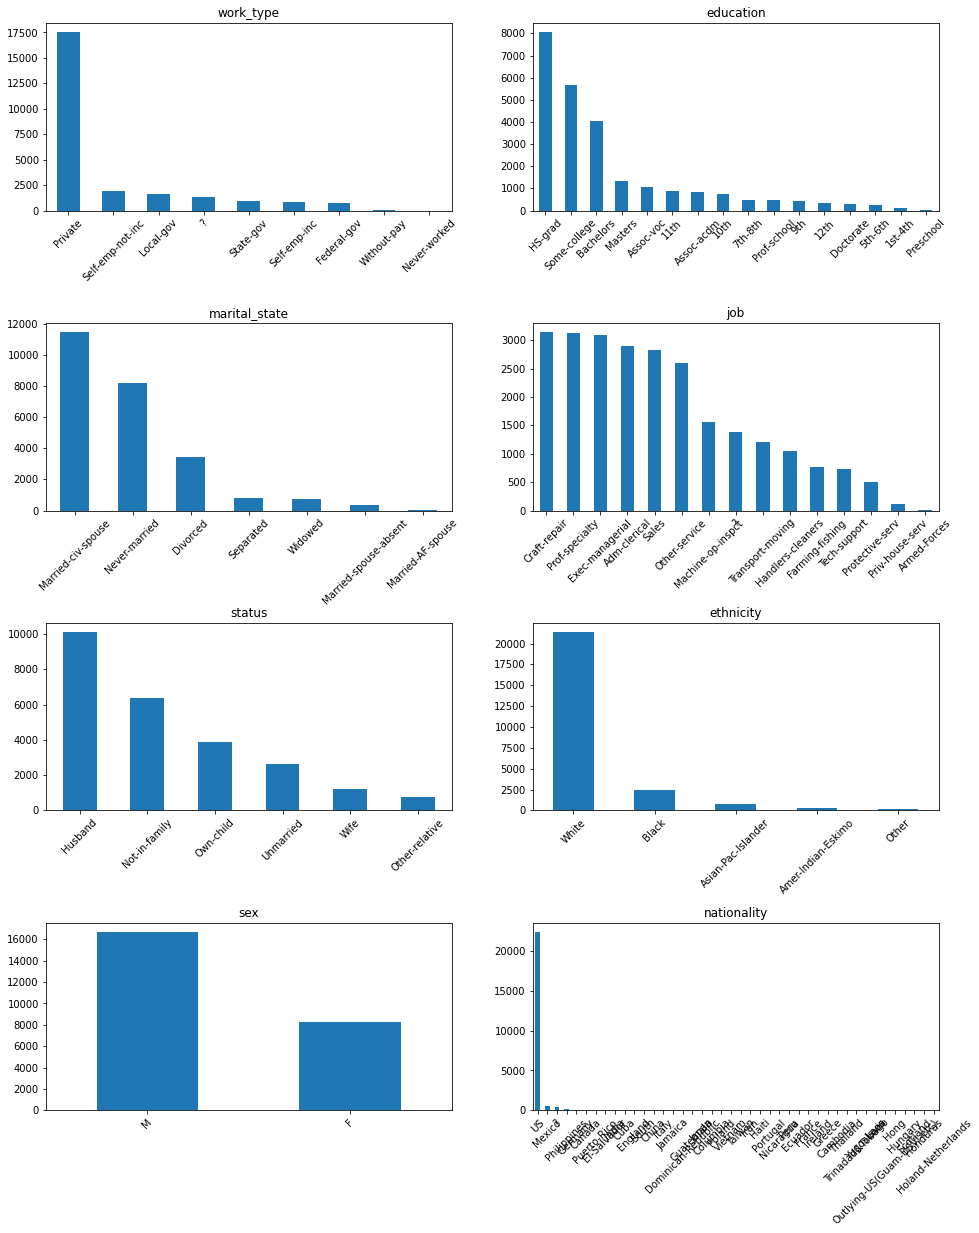

In [ ]:
gs = GridSpec(4, 2)
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.6)
for i, cat_col in enumerate(cat_cols):
    ax = plt.subplot(gs[i])
    df[cat_col].value_counts().plot.bar()
    ax.set_title(cat_col)
    plt.xticks(rotation=45)

###Numerical columns

In [ ]:
num_cols = df.select_dtypes('int64').columns
print(f"There are {len(num_cols)} numerical columns")

There are 7 numerical columns


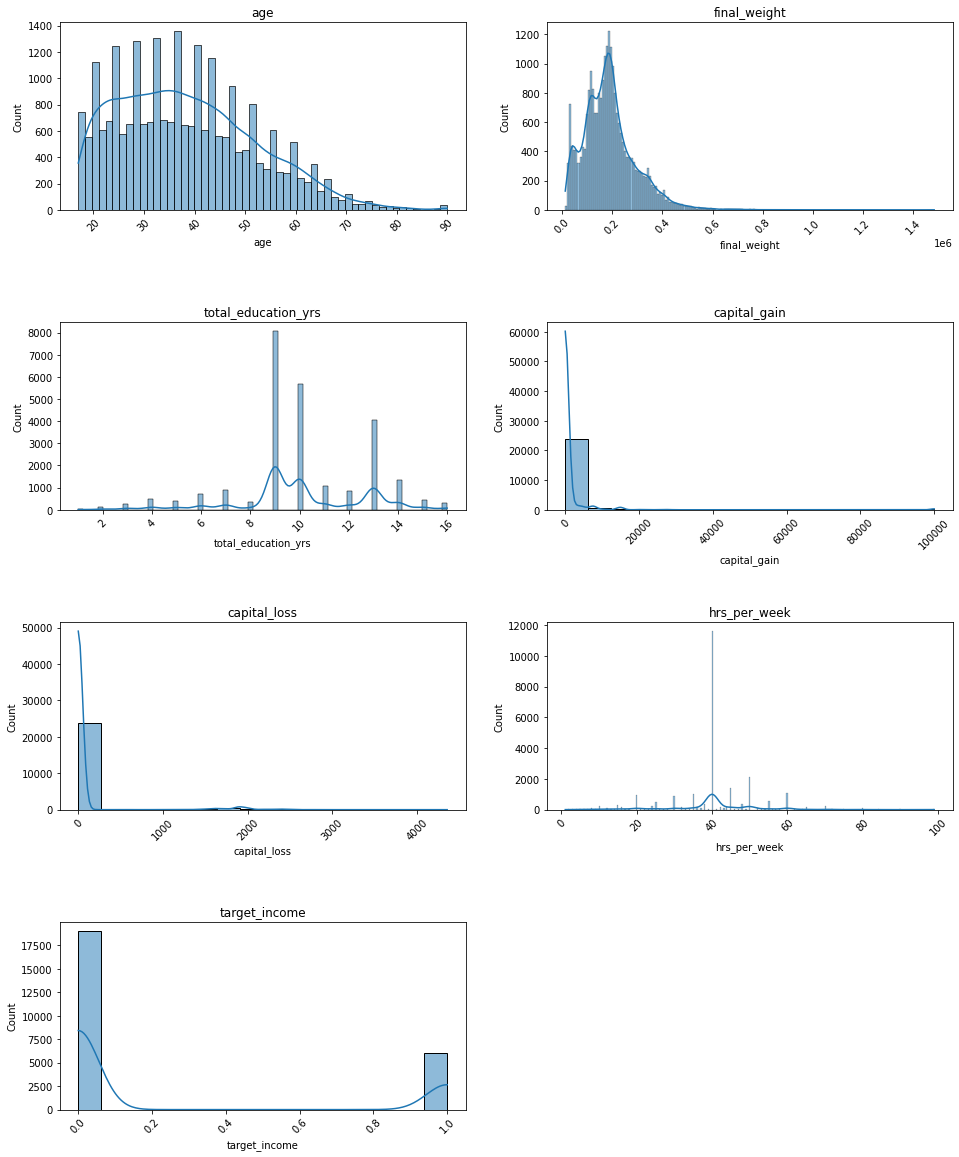

In [ ]:
gs = GridSpec(4, 2)
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.6)
for i, num_col in enumerate(num_cols):
    ax = plt.subplot(gs[i])
    sns.histplot(df[num_col], kde=True)
    ax.set_title(num_col)
    plt.xticks(rotation=45)

##Fill ? value

In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  25000 non-null  int64 
 1   work_type            23621 non-null  object
 2   final_weight         25000 non-null  int64 
 3   education            25000 non-null  object
 4   total_education_yrs  25000 non-null  int64 
 5   marital_state        25000 non-null  object
 6   job                  23616 non-null  object
 7   status               25000 non-null  object
 8   ethnicity            25000 non-null  object
 9   sex                  25000 non-null  object
 10  capital_gain         25000 non-null  int64 
 11  capital_loss         25000 non-null  int64 
 12  hrs_per_week         25000 non-null  int64 
 13  nationality          24557 non-null  object
 14  target_income        25000 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.9+ MB


In [ ]:
missing_value_columns = ['work_type', 'job', 'nationality']
for col in missing_value_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

##chuyển object columns thành one hot vector


In [ ]:
df_1hot = pd.get_dummies(df)
df_1hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 106 entries, age to nationality_Yugoslavia
dtypes: int64(7), uint8(99)
memory usage: 3.7 MB


##Cân bằng giá trị mục tiêu

In [ ]:
Y = df_1hot.pop('target_income')
ros = RandomOverSampler(random_state=42)
ros.fit(df_1hot, Y)
X_resampled, y_resampled = ros.fit_resample(df_1hot, Y)

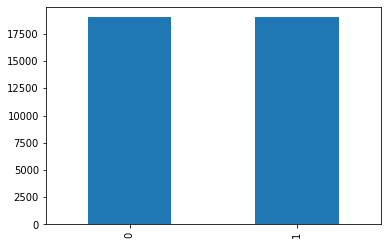

In [ ]:
y_resampled.value_counts().plot.bar()

##Phân chia tập dữ liệu

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (30422, 105)
y_train shape: (30422,)
X_test shape: (7606, 105)
y_test shape: (7606,)


##Chuẩn hóa dữ liệu

In [ ]:
def scaling(df, scaler, column_names, mode='train'):
    x = df[column_names].values
    if mode == 'train':
        x_scaled = scaler.fit_transform(x)
    else:
        x_scaled = scaler.transform(x)

    normalize_features = pd.DataFrame(data=x_scaled, columns=column_names, index=df.index)
    df[column_names] = normalize_features

    return df

In [ ]:
num_cols = df_1hot.select_dtypes('int64').columns
num_cols

Index(['age', 'final_weight', 'total_education_yrs', 'capital_gain',
       'capital_loss', 'hrs_per_week'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()

X_train = scaling(X_train, scaler, num_cols)
X_test = scaling(X_test, scaler, num_cols, mode='test')

##Chuẩn bị dữ liệu cho PyTorch

In [ ]:
#Prepare train dataset
X_train = torch.Tensor(X_train.values).float()
y_train = torch.Tensor(y_train.values).long()
train_dataset = td.TensorDataset(X_train, y_train)
train_loader = td.DataLoader(train_dataset, batch_size=32, num_workers=1)

#Prepare test dataset
X_test = torch.Tensor(X_test.values).float()
y_test = torch.Tensor(y_test.values).long()
test_dataset = td.TensorDataset(X_test, y_test)
test_loader = td.DataLoader(test_dataset, batch_size=32, num_workers=1)

In [ ]:
X_train.shape

torch.Size([30422, 105])

##Xây dựng mô hình

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(105, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, X):
        X = torch.relu(self.fc1(X))
        X = torch.relu(self.fc2(X))
        return X

##Huấn luyện mô hình

In [ ]:
def train(model, data_loader, optimizer):
    model.train()
    train_loss = 0

    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        optimizer.zero_grad() #reset gradient descent
        output = model(data)
        loss = loss_criteria(output, target)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = train_loss / (batch+1)
    print(f"Training set: Average loss: {avg_loss:.6f}")
    return avg_loss

In [ ]:
def test(model, data_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for batch, tensor in enumerate(data_loader):
            data, target = tensor
            output = model(data)
            test_loss += loss_criteria(output, target).item()
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target==predicted).item()

    avg_loss = test_loss / (batch+1)
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    avg_loss, correct, len(data_loader.dataset),
    100. * correct / len(data_loader.dataset)))

    return avg_loss

In [ ]:
model = Model()
loss_criteria = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

epoch_nums = []
training_loss = []
validation_loss = []

epochs = 50
for epoch in range(1, epochs + 1):
    print(f"Epoch: {epoch}")
    train_loss = train(model, train_loader, optimizer)
    test_loss = test(model, test_loader)

    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(validation_loss)

Epoch: 1
Training set: Average loss: 0.442458
Validation set: Average loss: 0.405275, Accuracy: 6174/7606 (81%)

Epoch: 2
Training set: Average loss: 0.393126
Validation set: Average loss: 0.389781, Accuracy: 6235/7606 (82%)

Epoch: 3
Training set: Average loss: 0.379520
Validation set: Average loss: 0.381804, Accuracy: 6253/7606 (82%)

Epoch: 4
Training set: Average loss: 0.371568
Validation set: Average loss: 0.377593, Accuracy: 6289/7606 (83%)

Epoch: 5
Training set: Average loss: 0.366408
Validation set: Average loss: 0.375025, Accuracy: 6301/7606 (83%)

Epoch: 6
Training set: Average loss: 0.362623
Validation set: Average loss: 0.373293, Accuracy: 6309/7606 (83%)

Epoch: 7
Training set: Average loss: 0.359463
Validation set: Average loss: 0.371114, Accuracy: 6313/7606 (83%)

Epoch: 8
Training set: Average loss: 0.356616
Validation set: Average loss: 0.369477, Accuracy: 6339/7606 (83%)

Epoch: 9
Training set: Average loss: 0.353875
Validation set: Average loss: 0.368230, Accuracy: 

In [ ]:
def display_metric(y_true, y_predict):
    print(f"Accuracy score: {accuracy_score(y_true, y_predict):.4f}")
    print(f"precision score: {precision_score(y_true, y_predict):.4f}")
    print(f"recall score: {recall_score(y_true, y_predict):.4f}")
    print(f"f1 score: {f1_score(y_true, y_predict):.4f}")

In [ ]:
_, y_predict = torch.max(model(X_test).data, 1)
display_metric(y_test, y_predict)

Accuracy score: 0.8354
precision score: 0.7922
recall score: 0.9096
f1 score: 0.8468


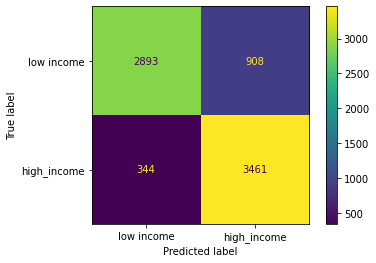

In [ ]:
model_cm = confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(model_cm, display_labels=['low income', 'high_income']).plot(values_format='d')

# Chữa. Câu trắc nghiệm 3 đáp án là B
